# 向量集合的变换

对于不同坐标系的表示方式 (笛卡尔坐标系, 极坐标系), 适应不同的应用场景, 例如:
- 笛卡尔坐标系更便于进行坐标的平移和缩放
- 极坐标系包含角度, 所以更方便进行坐标的旋转

## 1. 极坐标的旋转

在极坐标中, 角度的相加会使向量逆时针旋转, 角度的相减会使向量顺时针旋转. 例如: 极坐标 `(1, 2)` 的距离是 `1`, 角度是 `2` 弧度. (注意: 如果没有角度符号, 单位就是弧度）从 `2` 弧度开始, 加减 `1` 分别使向量逆时针或顺时针旋转 `1` 弧度

**知识:** 加减极坐标的弧度, 可以使坐标绕原点旋转

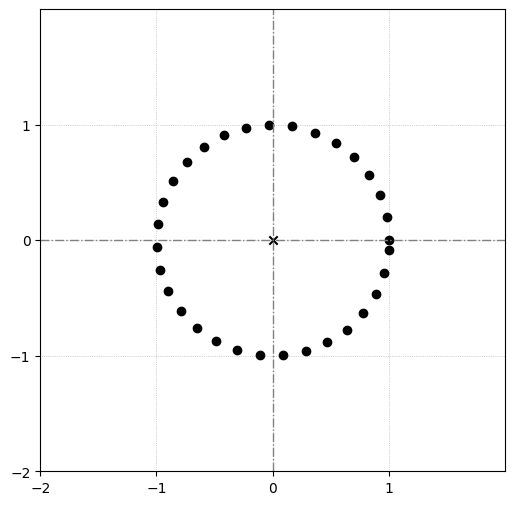

In [1]:
import math

from common.vector import to_cartesian
from draw.component import Points2D, draw2d

# 按 2pi 弧度 (360°) 产生极坐标集合
vectors = [to_cartesian((1, n / 10)) for n in range(0, int(2 * math.pi) * 10 + 3, 2)]

# 绘制极坐标
draw2d([Points2D(vectors, show_coord=False)])

**练习:** 将一个笛卡尔坐标向量集合逆时针旋转 `pi/4`

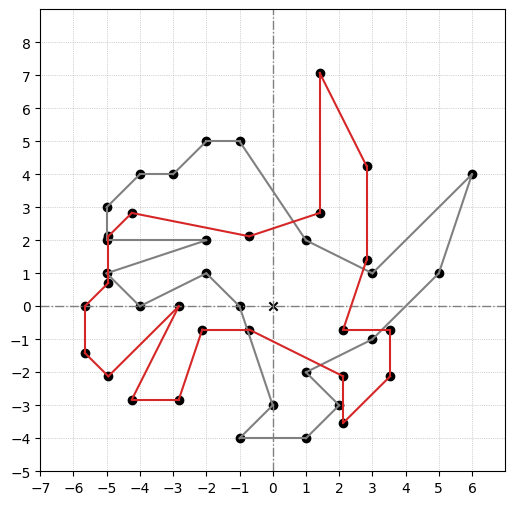

In [1]:
import math

from common.typedef import Polar, Vector2D
from common.vector import to_cartesian, to_polar
from draw.component import Color, Points2D, Polygon2D, draw2d

# 定义一个 2D 向量的集合, 由一组二维向量组成
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]


def to_polar_and_rotate(v: Vector2D) -> Polar:
    """将笛卡尔坐标转为极坐标, 并进行旋转

    Args:
        `v` (`Vector2D`): 将笛卡尔坐标

    Returns:
        `Polar`: 旋转后的极坐标
    """
    # 笛卡尔坐标转为极坐标
    pv = to_polar(v)
    # 返回逆时针旋转 pi / 4 弧度后的极坐标
    return (pv[0], pv[1] + (math.pi / 4))


# 将集合中的坐标转为极坐标
new_dino_vectors = [to_cartesian(to_polar_and_rotate(v)) for v in dino_vectors]

# 绘制图形
draw2d(
    [
        Points2D(dino_vectors, show_coord=False),
        Polygon2D(dino_vectors, color=Color.gray()),
        Points2D(new_dino_vectors, show_coord=False),
        Polygon2D(new_dino_vectors, color=Color.red()),
    ]
)

**知识:** 由此可得出坐标旋转的算法: 笛卡尔坐标转为极坐标, 对极坐标中表示弧度的值进行加减, 得到新的极坐标, 再转回笛卡尔坐标

In [1]:
from common.typedef import Number
from common.vector import Vector2D, to_cartesian, to_polar


def rotate2d(angle: Number, v: Vector2D) -> Vector2D:
    """将一个二维向量旋转指定弧度

    Args:
        `angle` (`Number`): 要旋转的弧度
        `v` (`Vector2D`): 要旋转的二维向量

    Returns:
        `Vector2D`: 旋转角度后的新向量
    """
    # 将向量转为极坐标
    l, a = to_polar(v)

    # 将极坐标的角度分量增加指定弧度后转为笛卡尔坐标向量
    return to_cartesian((l, a + angle))

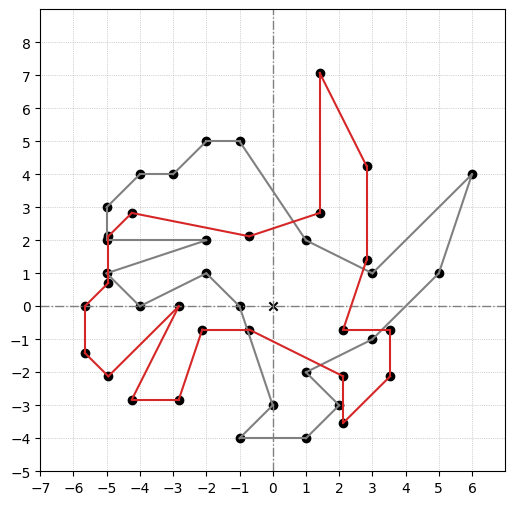

In [1]:
from typing import Iterable, List

import math
from common.typedef import Number
from common.transform import rotate2d
from draw.component import Color, Points2D, Polygon2D, draw2d

# 定义一个 2D 向量的集合, 由一组二维向量组成
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

# 将所有的二维向量选择指定弧度
new_dino_vectors = [rotate2d(math.pi / 4, v) for v in dino_vectors]

# 绘制图形
draw2d(
    [
        Points2D(dino_vectors, show_coord=False),
        Polygon2D(dino_vectors, color=Color.gray()),
        Points2D(new_dino_vectors, show_coord=False),
        Polygon2D(new_dino_vectors, color=Color.red()),
    ]
)

## 2. 向量的组合操作

借助笛卡尔坐标和极坐标的转换, 可以随意组合向量的旋转, 移动和缩放操作

**知识**: 在坐标旋转的基础上增加移动, 即可组合出更复杂的操作

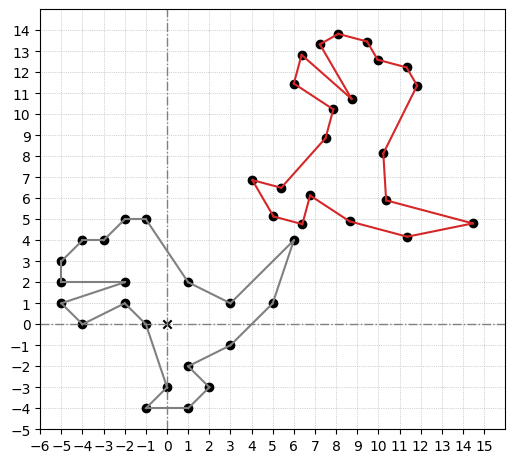

In [1]:
import math
from common.vector import translate, as_vector2d
from common.transform import rotate2d
from draw.component import Color, Points2D, Polygon2D, draw2d

# 定义一个 2D 向量的集合, 由一组二维向量组成
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

# 组合坐标的旋转和移动, 可以将图形进行组合变换
new_dino_vectors = [
    as_vector2d(v)
    for v in translate(
        (8, 8),  # 指定要移动的坐标
        [rotate2d(5 * math.pi / 3, v) for v in dino_vectors],  # 旋转坐标
    )
]

# 绘制图形
draw2d(
    [
        Points2D(dino_vectors, show_coord=False),
        Polygon2D(dino_vectors, color=Color.gray()),
        Points2D(new_dino_vectors, show_coord=False),
        Polygon2D(new_dino_vectors, color=Color.red()),
    ]
)

**练习:** 实现函数 `regular_polygon(n)`, 返回一个**规则多边形** (即所有角和边长都相等) 各顶点的笛卡儿坐标. 例如 `polygon(7)` 返回七边形的顶点向量

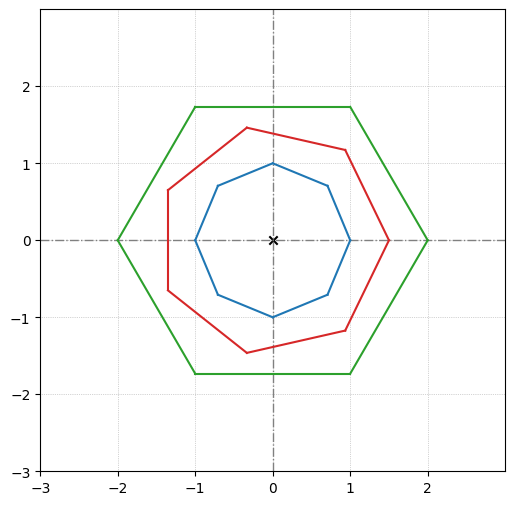

In [1]:
import math
from typing import Iterable

from common.typedef import Number
from common.vector import Vector2D, to_cartesian
from draw.component import Color, Polygon2D, draw2d


def regular_polygon(n: int, unit: Number = 1) -> Iterable[Vector2D]:
    """返回有规则多边形坐标点组成的向量集合

    Args:
        `n` (`int`): 多边形的边数
        `unit` (`int`, optional): 多边形的顶点长度. Defaults to `1`.

    Returns:
        `Iterable[Vector2D]`: 组成规则 `n` 边形的向量集合
    """
    if unit < 1:
        raise ValueError("unit must be greater than 0")

    for i in range(n):
        yield to_cartesian((unit, 2 * math.pi * (i / n)))


# 产生 6 边形向量集
v1 = list(regular_polygon(6, unit=2))

# 产生 7 边形向量集
v2 = list(regular_polygon(7, unit=1.5))

# 产生 8 边形向量集
v3 = list(regular_polygon(8, unit=1))

# 绘制 3 个规则 n 边形
draw2d(
    [
        Polygon2D(v1, color=Color.green()),
        Polygon2D(v2, color=Color.red()),
        Polygon2D(v3, color=Color.blue()),
    ]
)

**练习:** 向量移动和旋转的顺序, 从结果可知, 旋转前后进行平移的结果是不同的

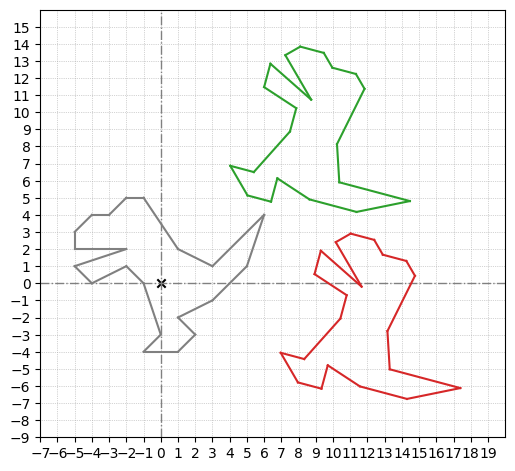

In [1]:
import math

from common.transform import rotate2d
from common.vector import as_vector2d, translate
from draw.component import Color, Polygon2D, draw2d

# 定义一个 2D 向量的集合, 由一组二维向量组成
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

# 先对向量集进行旋转, 再进行平移
new_dino_vectors1 = translate(
    (8, 8),
    [rotate2d(5 * math.pi / 3, v) for v in dino_vectors],
)

# 先对向量集进行平移, 在进行旋转
new_dino_vectors2 = [
    rotate2d(5 * math.pi / 3, as_vector2d(v)) for v in translate((8, 8), dino_vectors)
]

# 绘制 3 个规则 n 边形
draw2d(
    [
        # 绘制原始恐龙图形
        Polygon2D(dino_vectors, color=Color.gray()),
        # 绿色的恐龙是先旋转后平移的结果
        Polygon2D(new_dino_vectors1, color=Color.green()),
        # 红色的恐龙是先平移后旋转的结果
        Polygon2D(new_dino_vectors2, color=Color.red()),
    ]
)